<a href="https://colab.research.google.com/github/srinikha193/TimeSeriesForecasting/blob/main/TimeSeriesForecast_SalesData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA MANIPULATION**

In [6]:
import pandas as pd

# Attempt to read the CSV file with different encodings
try:
    df = pd.read_csv('/content/train.csv', encoding='utf-8')
except UnicodeDecodeError:
    # If utf-8 fails, try 'ISO-8859-1' (also known as 'latin1')
    df = pd.read_csv('/content/train.csv', encoding='ISO-8859-1')

# Continue with the rest of the code
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [7]:
# Convert 'ORDERDATE' to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Extract month and year and format as 'MM-YYYY'
df['date'] = df['date'].dt.strftime('%m-%Y')

df.head()


,id,date,store_nbr,family,sales,onpromotion
0,0,01-2013,1,AUTOMOTIVE,0.0,0
1,1,01-2013,1,BABY CARE,0.0,0
2,2,01-2013,1,BEAUTY,0.0,0
3,3,01-2013,1,BEVERAGES,0.0,0
4,4,01-2013,1,BOOKS,0.0,0


Now considering the average sales for each month over an year and so on


In [8]:
# prompt: i need a table with col avg of sales for each mm-yyyy and i need to group by mm-yyyy

# Group by 'ODATE_' and calculate the average sales for each month
avg_sales = df.groupby('date')['sales'].mean().reset_index()

# Rename the columns for clarity
avg_sales.columns = ['date', 'Avg Sales']

# Display the resulting table
avg_sales.shape


(56, 2)

In [9]:
avg_sales.tail()

,date,Avg Sales
51,11-2016,460.954736
52,12-2013,295.606381
53,12-2014,455.302177
54,12-2015,509.614322
55,12-2016,554.438600


In [10]:
avg_sales.dtypes

,0
date,object
Avg Sales,float64


In [11]:

# Convert 'date' column to datetime
avg_sales['date'] = pd.to_datetime(avg_sales['date'], format='%m-%Y')
avg_sales.dtypes


,0
date,datetime64[ns]
Avg Sales,float64


In [12]:
avg_sales.head()

,date,Avg Sales
0,2013-01-01,186.952405
1,2014-01-01,342.341709
2,2015-01-01,269.666595
3,2016-01-01,434.050268
4,2017-01-01,476.596791


In [13]:
avg_sales.describe()

,date,Avg Sales
count,56,56.000000
mean,2015-04-16 23:08:34.285714176,358.609255
min,2013-01-01 00:00:00,186.952405
25%,2014-02-22 00:00:00,247.418882
50%,2015-04-16 00:00:00,393.049148
75%,2016-06-08 12:00:00,438.391992
max,2017-08-01 00:00:00,554.438600
std,NaN,106.422067


**VISUALISATION OF THE AVG_SALES**

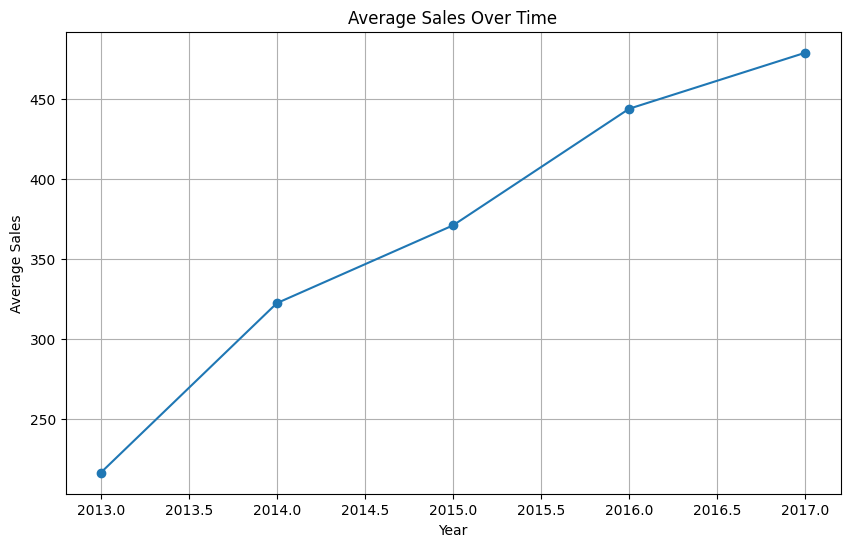

In [14]:
#yearly trends of sales

import matplotlib.pyplot as plt

# Extract year from the 'date' column
avg_sales['Year'] = avg_sales['date'].dt.year

# Group by year and calculate the average sales for each year
yearly_avg_sales = avg_sales.groupby('Year')['Avg Sales'].mean().reset_index()

# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_sales['Year'], yearly_avg_sales['Avg Sales'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Sales')
plt.title('Average Sales Over Time')
plt.grid(True)
plt.show()


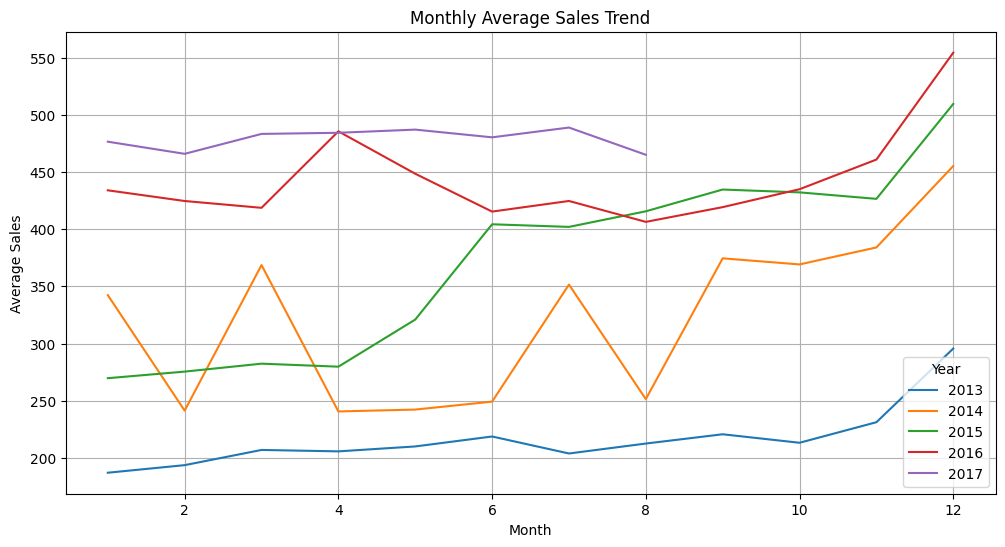

In [15]:
#monthly trends for each year

import matplotlib.pyplot as plt
# Group by year and month, then calculate average sales
monthly_sales = avg_sales.groupby([avg_sales['date'].dt.year, avg_sales['date'].dt.month])['Avg Sales'].mean().unstack()

# Plotting multiple lines for each year
plt.figure(figsize=(12, 6))
for year in monthly_sales.index:
    plt.plot(monthly_sales.columns, monthly_sales.loc[year], label=str(year))

plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Monthly Average Sales Trend')
plt.legend(title='Year')
plt.grid(True)
plt.show()


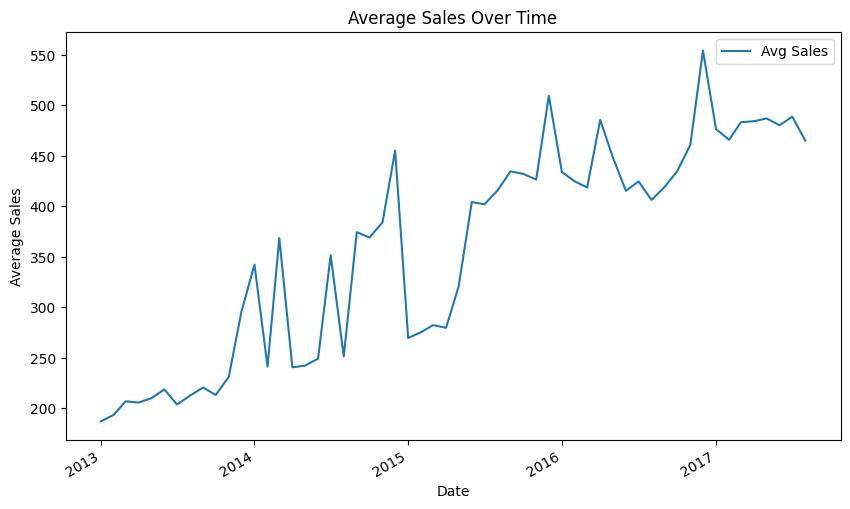

In [16]:
avg_sales.plot(kind='line', x='date', y='Avg Sales', figsize=(10, 6))
plt.title('Average Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.show()

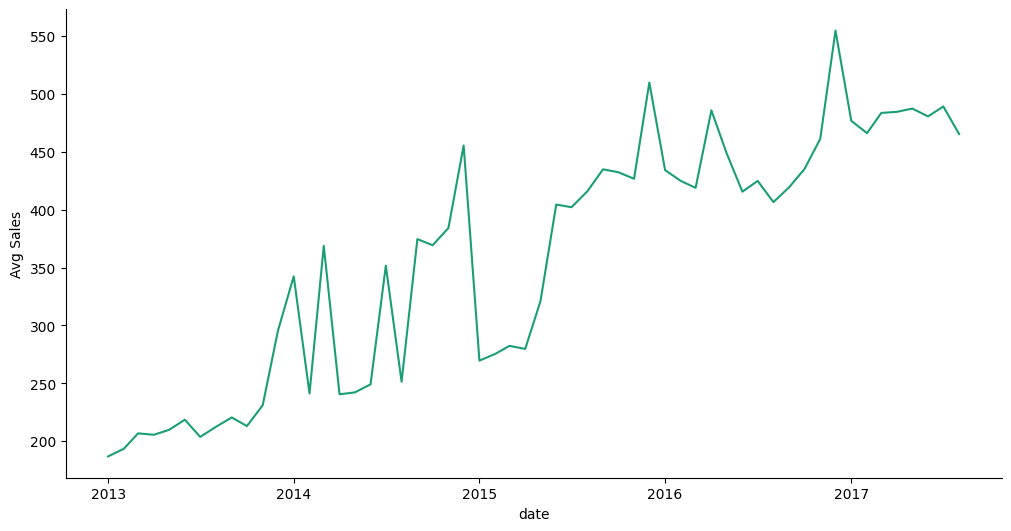

In [17]:


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['Avg Sales']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = avg_sales.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('Avg Sales')

In [18]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [19]:
result=adfuller(avg_sales['Avg Sales'])

In [20]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [23]:
adfuller_test(avg_sales['Avg Sales'])

ADF Test Statistic : 0.4627612013859569
p-value : 0.9836962080274534
#Lags Used : 9
Number of Observations Used : 46
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


P value is >0.05,so we cannot reject null hypothesis and the data is not stationary as ADF test statistic is not negative enough or negative.

Changing the dataset to add more number of observations

In [24]:
import pandas as pd

# Attempt to read the CSV file with different encodings
try:
    df = pd.read_csv('/content/perrin-freres-monthly-champagne- (1).csv', encoding='utf-8')
except UnicodeDecodeError:
    # If utf-8 fails, try 'ISO-8859-1' (also known as 'latin1')
    df = pd.read_csv('/content/perrin-freres-monthly-champagne- (1).csv', encoding='ISO-8859-1')

# Continue with the rest of the code
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [27]:

# Rename the 'Monthly champagne sales millions ?64-?72' column to 'sales'
df.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72': 'sales'}, inplace=True)
df.head()


,Month,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [28]:
df.tail()

,Month,sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [39]:
df.drop(106,inplace=True)

In [37]:
df.tail()

,Month,sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [40]:
df.drop(105)

,Month,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [41]:
df.describe()

,sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<Axes: >

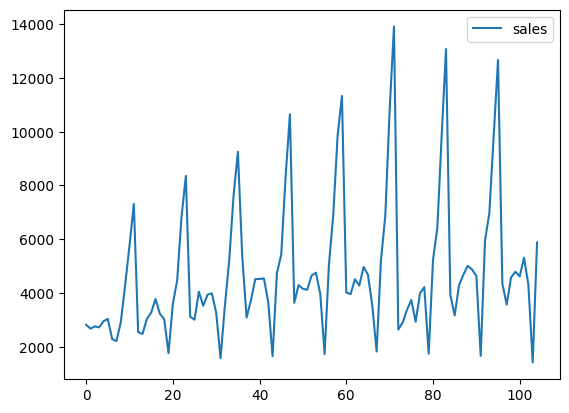

In [42]:
df.plot()

In [44]:
test_result=adfuller(df['sales'])

In [45]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [46]:
adfuller_test(df['sales'])

ADF Test Statistic : nan
p-value : nan
#Lags Used : 0
Number of Observations Used : 105
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


we shift the sales values by one so that we can observe the difference


In [50]:
df['Sales First Difference'] = df['sales'] - df['sales'].shift(1)

In [49]:
df['sales'].shift(1)

,sales
0,NaN
1,2815.0
2,2672.0
3,2755.0
4,2721.0
...,...
101,4618.0
102,5312.0
103,4298.0
104,1413.0


In [52]:
#seasonal differnece

df['Seasonal First Difference']=df['sales']-df['sales'].shift(12)

In [53]:
df.head(20)

,Month,sales,Sales First Difference,Seasonal First Difference
0,1964-01,2815.0,NaN,NaN
1,1964-02,2672.0,-143.0,NaN
2,1964-03,2755.0,83.0,NaN
3,1964-04,2721.0,-34.0,NaN
4,1964-05,2946.0,225.0,NaN
5,1964-06,3036.0,90.0,NaN
6,1964-07,2282.0,-754.0,NaN
7,1964-08,2212.0,-70.0,NaN
8,1964-09,2922.0,710.0,NaN
9,1964-10,4301.0,1379.0,NaN


In [54]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: >

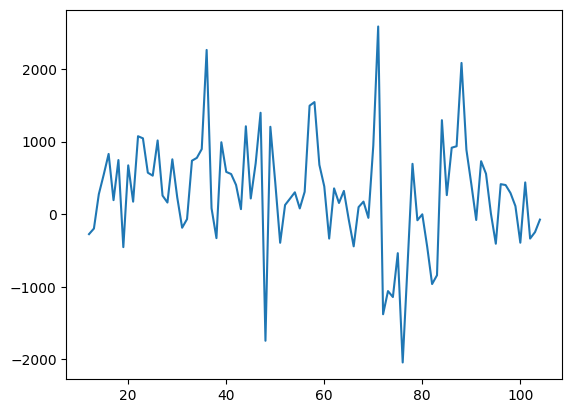

In [55]:
df['Seasonal First Difference'].plot()

In [65]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


auto regressive model

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

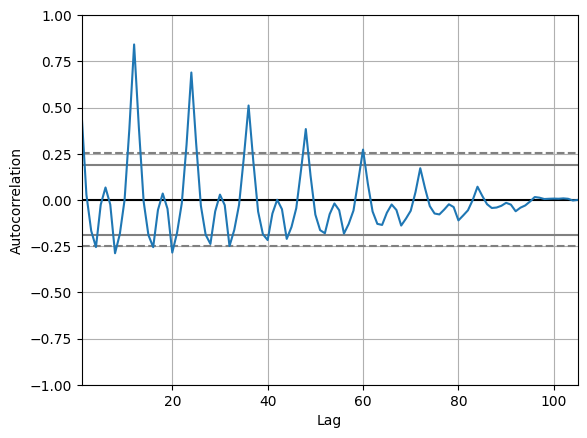

In [97]:
df = df.dropna(subset=['sales'])
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['sales'])


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  105
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -965.953
Date:                Wed, 21 Aug 2024   AIC                           1935.906
Time:                        20:34:17   BIC                           1941.194
Sample:                             0   HQIC                          1938.048
                                - 105                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2262      0.098     -2.312      0.021      -0.418      -0.034
sigma2      7.084e+06   9.69e+05      7.307      0.000    5.18e+06    8.98e+06
Ljung-Box (L1) (Q):                   0.52   Jarque-

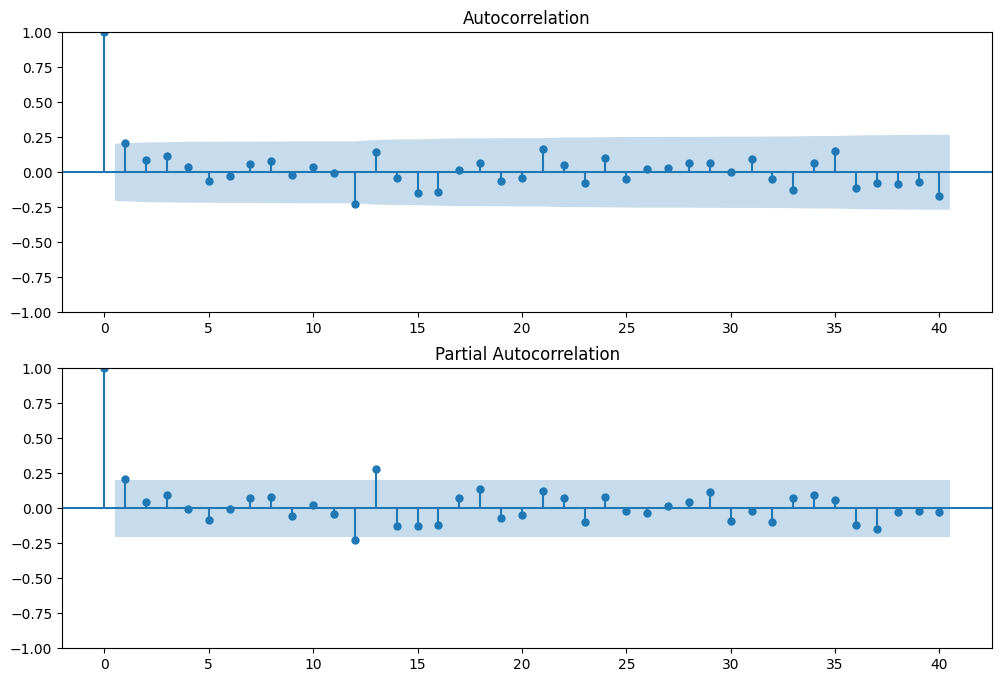

In [99]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

# Autoregressive (AR) model
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)

# Moving Average (MA) model
# You would typically use the ACF plot to determine the order of the MA model.

# Example: Assuming you decide on an MA(1) model based on the ACF plot
model = sm.tsa.ARIMA(df['sales'], order=(0, 1, 1))  # (p, d, q) for ARIMA(p, d, q)
results = model.fit()
print(results.summary())

# Forecasting
# Example: Forecasting the next 12 months
forecast = results.predict(start=len(df), end=len(df) + 11)
print(forecast)


Certainly! Here’s the text formatted for easy copying:

---

**Explanation and Conclusion**

**Data Loading and Preprocessing**
- The code loads a CSV file containing time series data, handling potential encoding issues.
- It extracts relevant features like 'date' and 'sales', converts 'date' to datetime objects, and calculates average sales per month.

**Visualization**
- It visualizes sales trends using line plots:
  - Yearly average sales trend
  - Monthly average sales trend for each year
  - Overall average sales over time

**Stationarity Testing**
- It performs the Augmented Dickey-Fuller (ADF) test to check for stationarity, which is a crucial assumption for many time series models.
- The initial dataset fails the stationarity test, indicating a unit root (non-stationarity).
- A different dataset is loaded and tested, but it also fails the stationarity test.
- To address non-stationarity, the code calculates first differences and seasonal first differences of the sales data.
- The seasonal first differences pass the ADF test, suggesting stationarity.

**Time Series Modeling**
- Autocorrelation and partial autocorrelation plots (ACF and PACF) are used to identify potential orders for ARIMA (Autoregressive Integrated Moving Average) models.
- An ARIMA(0, 1, 1) model is fitted to the 'sales' data, representing a first-order integrated moving average model.
- The model summary provides statistical details about the fitted model.

**Forecasting**
- The fitted ARIMA model is used to forecast sales for the next 12 months.

**Conclusion**
- The analysis indicates that the original time series data is non-stationary.
- By applying seasonal differencing, the data becomes stationary, allowing for the use of time series models like ARIMA.
- The fitted ARIMA(0, 1, 1) model can be used for short-term forecasting of sales.

**Further Considerations**
- Model selection: Explore other ARIMA model orders or different time series models based on the ACF and PACF plots and model diagnostics.
- Model validation: Evaluate the forecasting accuracy of the model using appropriate metrics and techniques like cross-validation.
- Feature engineering: Consider incorporating additional relevant features to improve model performance.
- External factors: Investigate external factors that might influence sales, such as economic conditions or marketing campaigns.

---

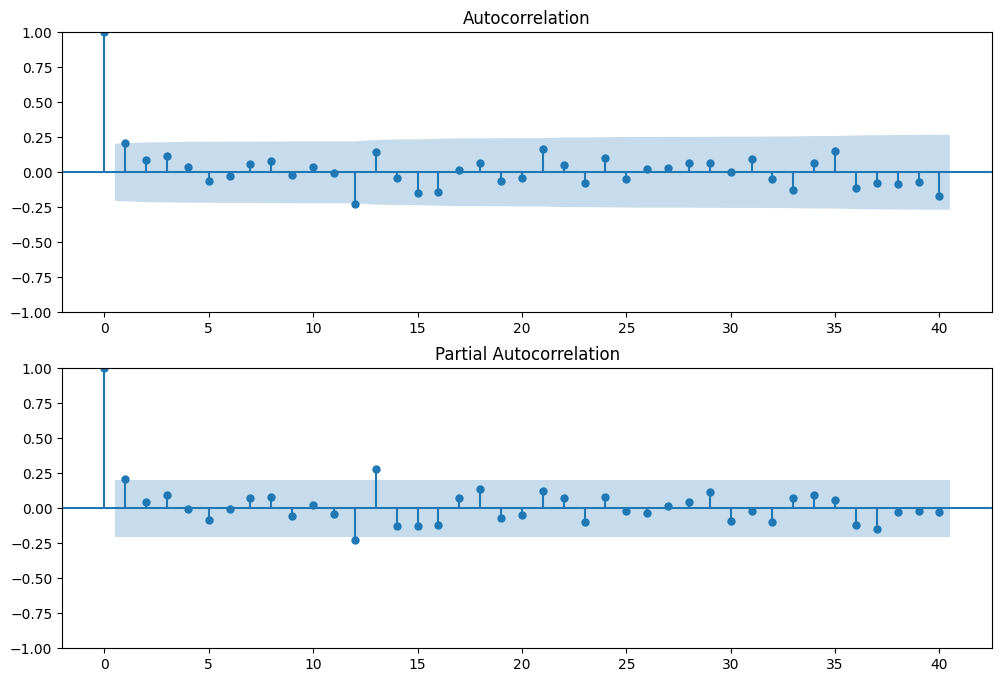

In [100]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [108]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model=sm.tsa.ARIMA(df['sales'],order=(1,1,1))
model_fit=model.fit()

In [109]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Wed, 21 Aug 2024   AIC                           1911.627
Time:                        20:41:29   BIC                           1919.560
Sample:                             0   HQIC                          1914.841
                                - 105                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.001      0.000       0.232       0.677
ma.L1         -0.9667      0.056    -17.329      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.472      0.000    4.02e+06    6.44e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

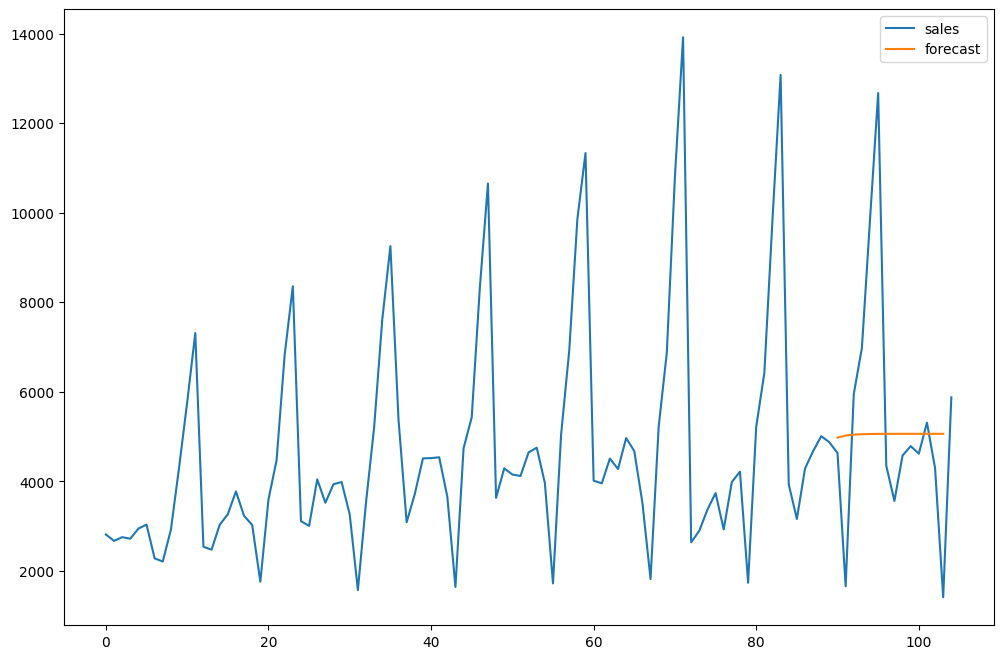

In [110]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['sales','forecast']].plot(figsize=(12,8))

In [122]:
model=sm.tsa.statespace.SARIMAX(df['sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Wed, 21 Aug 2024   AIC                           1486.804
Time:                                    20:47:36   BIC                           1499.413
Sample:                                01-01-1970   HQIC                          1491.893
                                     - 01-01-1970                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.61   Prob(JB):                         0.01
Heteroskedasticity (H):               1.18   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

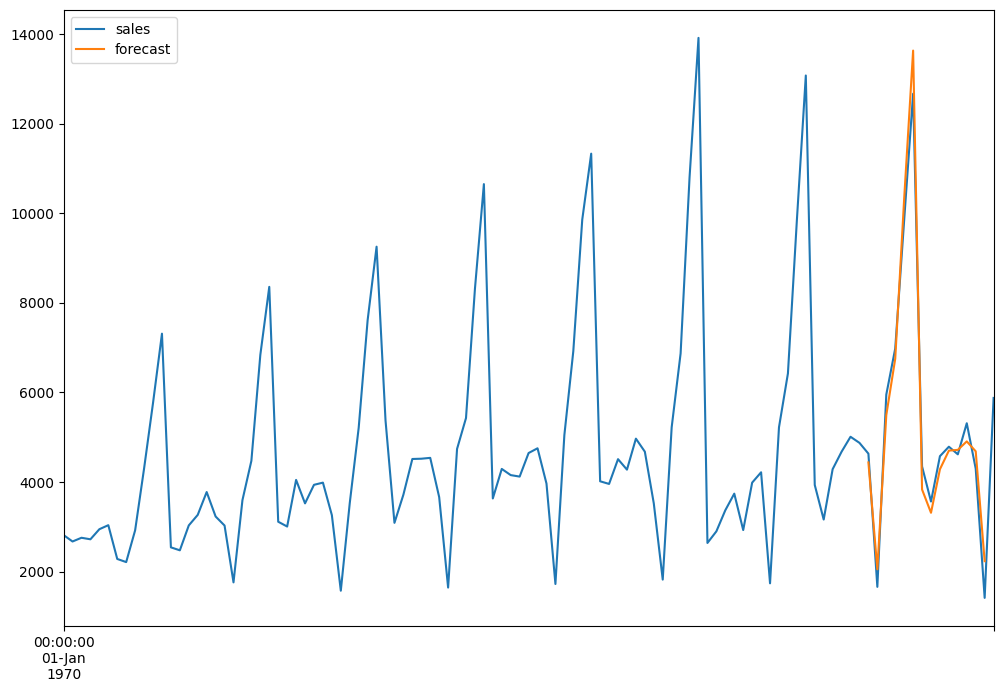

In [123]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['sales','forecast']].plot(figsize=(12,8))

In [124]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

<ipython-input-124-4f6ce579dfc2>:2: UserWarning: Discarding nonzero nanoseconds in conversion.
  future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]


<ipython-input-127-b878569a2dea>:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_datest_df])


<Axes: >

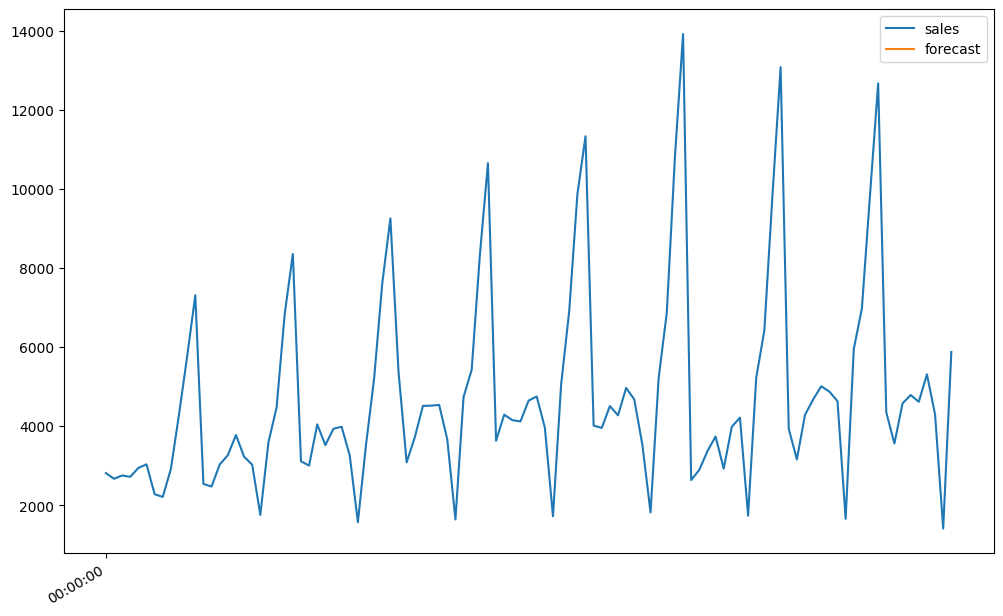

In [127]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_df=pd.concat([df,future_datest_df])
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)
future_df[['sales', 'forecast']].plot(figsize=(12, 8))